In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.metrics import pairwise_distances_argmin
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train = pd.read_csv('optdigits.tra', sep=",")
#df.shape()
print("**********This is my Training set**********")
print(train.head())
print(train.shape)
train.info
train.describe()

def calc_train_error(features_train, target_train, df):
    #returns in-sample error for already fit model
    predictor = df.predict(features_train)
    mse = mean_squared_error(target_train, predictor)
    rmse = np.sqrt(mse)
    return mse

def calc_validation_error(features_test, target_test, df):
    #returns out-of-sample error for already fit model
    predictor = df.predict(features_test)
    mse = mean_squared_error(target_test, predictor)
    rmse = np.sqrt(mse)
    return mse

def calc_metrics(features_train, target_train, features_test, target_test, df):
    #fits model and returns the RMSE for in-sample error and out-of-sample error
    df.fit(features_train, target_train)
    train_error = calc_train_error(features_train, target_train, df)
    validation_error = calc_validation_error(features_test, target_test, model)
    return train_error, validation_error

**********This is my Training set**********
   0  1   6  15  12  1.1  0.1  0.2  0.3  7  ...  0.21  0.22  0.23  6.3  14.1  \
0  0  0  10  16   6    0    0    0    0  7  ...     0     0     0   10    16   
1  0  0   8  15  16   13    0    0    0  1  ...     0     0     0    9    14   
2  0  0   0   3  11   16    0    0    0  0  ...     0     0     0    0     1   
3  0  0   5  14   4    0    0    0    0  0  ...     0     0     0    4    12   
4  0  0  11  16  10    1    0    0    0  4  ...     3     0     0   10    16   

   7.4  1.3  0.24  0.25  0.26  
0   15    3     0     0     0  
1    0    0     0     0     7  
2   15    2     0     0     4  
3   14    7     0     0     6  
4   16   16    16     6     2  

[5 rows x 65 columns]
(3822, 65)


In [3]:
#Implementing K-means here. (Q1 of the assignment)

In [4]:
test = pd.read_csv('optdigits.tes', sep=",")
print("**********This is my Testing set**********")
print(test.head())
print(test.shape)
test.info
test.describe()

**********This is my Testing set**********
   0  0.1   5  13   9   1  0.2  0.3  0.4  0.5  ...  0.23  0.24  0.25  6  13.2  \
0  0    0   0  12  13   5    0    0    0    0  ...     0     0     0  0    11   
1  0    0   0   4  15  12    0    0    0    0  ...     0     0     0  0     3   
2  0    0   7  15  13   1    0    0    0    8  ...     0     0     0  7    13   
3  0    0   0   1  11   0    0    0    0    0  ...     0     0     0  0     2   
4  0    0  12  10   0   0    0    0    0    0  ...     0     0     0  9    16   

   10.2  0.26  0.27  0.28  0.29  
0    16    10     0     0     1  
1    11    16     9     0     2  
2    13     9     0     0     3  
3    16     4     0     0     4  
4    16    10     0     0     5  

[5 rows x 65 columns]
(1796, 65)


,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
count,1796.0,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000,...,1796.000000,1796.000000,1796.000000,1796.00000,1796.00000,1796.000000,1796.000000,1796.000000,1796.000000,1796.000000
mean,0.0,0.304009,5.204900,11.835189,11.849666,5.784521,1.363029,0.129733,0.005568,1.994989,...,0.206570,0.000557,0.279510,5.55735,12.08853,11.810134,6.767817,2.069042,0.364699,4.493318
std,0.0,0.907416,4.756148,4.249936,4.288055,5.666871,3.326546,1.037667,0.094248,3.196704,...,0.984663,0.023596,0.934539,5.10443,4.37586,4.935137,5.900105,4.091396,1.860620,2.864140
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,11.00000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.00000,13.00000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.00000,16.00000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.00000,16.00000,16.000000,16.000000,16.000000,16.000000,9.000000


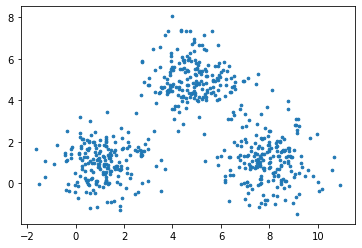

In [251]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [252]:
k = 10

n = train.shape[0]

c = test.shape[0]

In [253]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3822.0,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,...,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03,3.822000e+03
mean,0.0,8.040548e-16,-1.678406e-16,-2.744476e-16,-9.458101e-17,8.749324e-17,-3.862324e-17,-1.376886e-16,-7.188055e-16,-3.165094e-16,...,8.233718e-17,4.849237e-16,5.103192e-16,-1.917764e-16,-6.095769e-16,-1.692930e-16,2.789791e-16,9.812199e-16,1.382245e-15,3.578741e-17
std,0.0,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,...,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00
min,0.0,-3.473837e-01,-1.183542e+00,-2.771471e+00,-2.523684e+00,-9.811057e-01,-4.116295e-01,-1.353504e-01,-2.363226e-02,-6.420892e-01,...,-1.932272e-01,-1.617750e-02,-3.050511e-01,-1.175868e+00,-2.755282e+00,-2.296409e+00,-1.160502e+00,-5.228807e-01,-1.757642e-01,-1.567994e+00
25%,0.0,-3.473837e-01,-9.676336e-01,-4.237767e-01,-5.402333e-01,-9.811057e-01,-4.116295e-01,-1.353504e-01,-2.363226e-02,-6.420892e-01,...,-1.932272e-01,-1.617750e-02,-3.050511e-01,-9.750650e-01,-4.481468e-01,-4.933119e-01,-1.160502e+00,-5.228807e-01,-1.757642e-01,-8.708644e-01
50%,0.0,-3.473837e-01,-1.039999e-01,2.805317e-01,3.413001e-01,-2.684219e-01,-4.116295e-01,-1.353504e-01,-2.363226e-02,-6.420892e-01,...,-1.932272e-01,-1.617750e-02,-3.050511e-01,-1.718540e-01,2.439937e-01,3.080644e-01,-1.215548e-01,-5.228807e-01,-1.757642e-01,-1.737351e-01
75%,0.0,-3.473837e-01,7.596339e-01,7.500706e-01,7.820669e-01,8.006039e-01,-4.116295e-01,-1.353504e-01,-2.363226e-02,3.411099e-01,...,-1.932272e-01,-1.617750e-02,-3.050511e-01,8.321598e-01,7.054207e-01,9.090967e-01,9.173921e-01,-2.637137e-02,-1.757642e-01,8.719587e-01
max,0.0,8.880769e+00,2.270993e+00,9.848400e-01,1.002450e+00,1.869630e+00,4.334217e+00,1.507963e+01,5.642793e+01,4.273906e+00,...,1.543671e+01,6.181424e+01,1.047041e+01,2.036976e+00,9.361343e-01,9.090967e-01,1.610023e+00,3.449194e+00,1.372894e+01,1.569088e+00


In [174]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=10, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [175]:
kmeans.inertia_

154060.74453427398

Text(0, 0.5, 'Inertia')

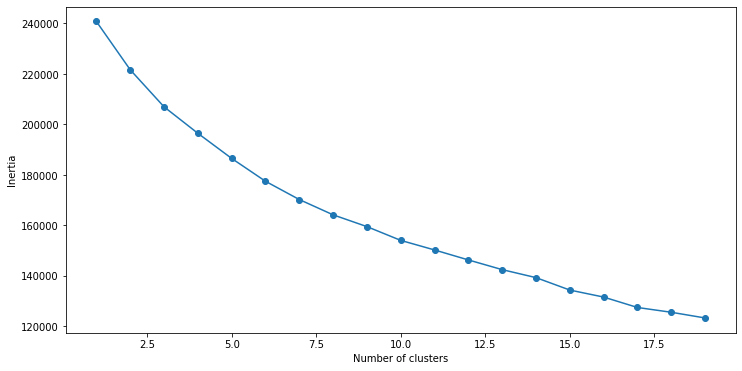

In [176]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [177]:
# k means using 10 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 10, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

6    788
5    661
3    435
0    395
1    386
2    373
8    370
4    312
9     76
7     26
Name: cluster, dtype: int64

In [178]:
# k means using 20 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 20, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

8     374
1     371
5     356
17    350
2     341
15    325
12    292
16    274
0     269
3     239
4     211
6     156
7     120
18     59
9      48
19     21
10      9
13      5
14      1
11      1
Name: cluster, dtype: int64

In [179]:
train.isna().head()

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25,0.26
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [180]:
test.isna().head()

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Implementing PCA here. Q2 of the assignment.

In [181]:
features = train.values[:,:8]
target = train.values[:,8]  
kf = KFold(n_splits=10, random_state = 42)
kf.get_n_splits(features)

for train_index, test_index in kf.split(features):
    print("Train index: ", train_index, "\n")
    print("Test index: ", test_index, "\n")
    features_train, features_test = features[train_index], features[test_index]
    target_train, target_test = target[train_index], target[test_index]

print(kf)

Train index:  [ 383  384  385 ... 3819 3820 3821] 

Test index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

In [182]:
features = StandardScaler().fit_transform(features)
print(features)

[[ 0.         -0.34738369  0.97554234 ... -0.98110567 -0.41162954
  -0.13535039]
 [ 0.         -0.34738369  0.54372547 ...  1.33511671 -0.41162954
  -0.13535039]
 [ 0.         -0.34738369 -1.18354205 ...  1.86962957 -0.41162954
  -0.13535039]
 ...
 [ 0.         -0.34738369 -0.53581673 ... -0.98110567 -0.41162954
  -0.13535039]
 [ 0.         -0.34738369  0.11190859 ... -0.98110567 -0.41162954
  -0.13535039]
 [ 0.         -0.34738369 -0.75172517 ...  1.33511671 -0.11501414
  -0.13535039]]


In [186]:
pca = PCA(n_components=1)
pca.fit(features)
features_pca = pca.transform(features)
print("original shape:   ", features.shape)
print("transformed shape:", features_pca.shape)

original shape:    (3822, 8)
transformed shape: (3822, 1)


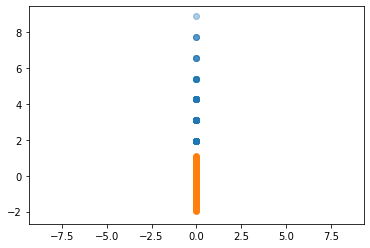

In [188]:
features_new = pca.inverse_transform(features_pca)
plt.scatter(features[:, 0], features[:, 1], alpha=0.2)
plt.scatter(features_new[:, 0], features_new[:, 1], alpha=0.8)
plt.axis('equal');

In [190]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [191]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


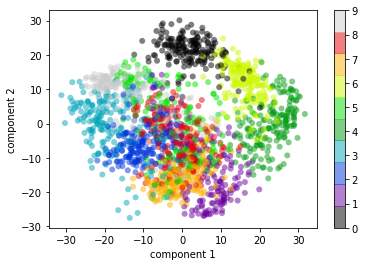

In [195]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [196]:
#Implementing LDA here. Part of Q3 in the assignment

In [215]:
lda = LDA(n_components=1)
features_train = lda.fit_transform(features_train, target_train)
features_test = lda.transform(features_test)

In [218]:
cm = confusion_matrix(target_test, target_pred)
print(cm)
print('Accuracy' + str(accuracy_score(target_test, target_pred)))

[[380   0   0]
 [  1   0   0]
 [  1   0   0]]
Accuracy0.9947643979057592


In [219]:
#Notice, the accuracy with LDA is 99%

In [220]:
#Implementing knn algorithm here. Part of Q4 of the assignment

In [266]:
#k-nn_classifier for n = 3
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(features_train, target_train)
features_pred = classifier.predict(features_test)

print(classification_report(target_test, target_pred))
print(cross_val_score(classifier, features, target, scoring='accuracy').mean())
print(metrics.accuracy_score(target_test, features_pred, normalize = True))

#Calculating training and validation errors for each fold of 3-nn_classifier
print("Training Error: ",calc_train_error(features_train, target_train, classifier))
print("Validation Error: ",calc_validation_error(features_test, target_test, classifier))

C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       380
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.99       382
   macro avg       0.33      0.33      0.33       382
weighted avg       0.99      0.99      0.99       382

0.9992163009404389
0.9947643979057592
Training Error:  0.00029069767441860465
Validation Error:  0.07591623036649214


In [267]:
#k-nn_classifier for n = 5
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(features_train, target_train)
features_pred = classifier1.predict(features_test)

print(classification_report(target_test, target_pred))
print(cross_val_score(classifier1, features, target, scoring='accuracy').mean())
print(metrics.accuracy_score(target_test, features_pred, normalize = True))

#Calculating training and validation errors for each fold of 5-nn_classifier
print("Training Error: ",calc_train_error(features_train, target_train, classifier1))
print("Validation Error: ",calc_validation_error(features_test, target_test, classifier1))

C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       380
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.99       382
   macro avg       0.33      0.33      0.33       382
weighted avg       0.99      0.99      0.99       382

0.9992163009404389
0.9947643979057592
Training Error:  0.00029069767441860465
Validation Error:  0.07591623036649214


In [268]:
#k-nn_classifier for n = 15
classifier2 = KNeighborsClassifier(n_neighbors=3)
classifier2.fit(features_train, target_train)
features_pred = classifier2.predict(features_test)

print(classification_report(target_test, target_pred))
print(cross_val_score(classifier2, features, target, scoring='accuracy').mean())
print(metrics.accuracy_score(target_test, features_pred, normalize = True))

#Calculating training and validation errors for each fold of 15-nn_classifier
print("Training Error: ",calc_train_error(features_train, target_train, classifier2))
print("Validation Error: ",calc_validation_error(features_test, target_test, classifier2))

C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       380
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.99       382
   macro avg       0.33      0.33      0.33       382
weighted avg       0.99      0.99      0.99       382

0.9992163009404389
0.9947643979057592
Training Error:  0.00029069767441860465
Validation Error:  0.07591623036649214


In [269]:
#Implementing the previous question with PCA Q5a)

In [270]:
# project from 64 to 2 dimensions
pca = PCA(2)  
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


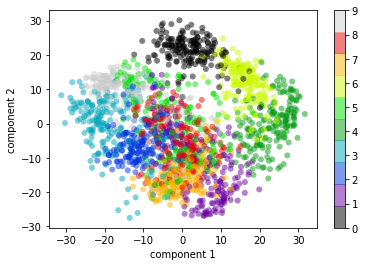

In [271]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [273]:
# project from 64 to 5 dimensions
pca1 = PCA(5) 
projected = pca1.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 5)


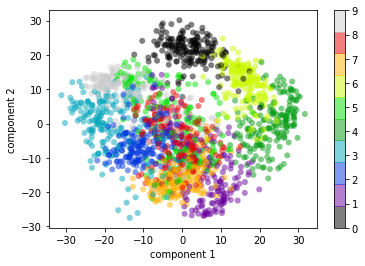

In [274]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [276]:
#Project from 64 to 9 dimensions
pca2 = PCA(9) 
projected = pca2.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 9)


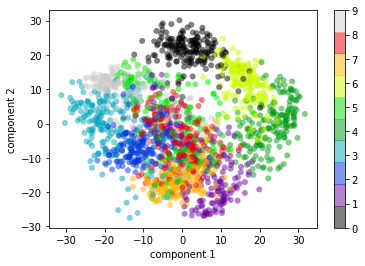

In [277]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
#Implementing Q4 with LDA, Q5b)

In [279]:
#Project from 64 to 2 dimensions
lda1 = LDA(n_components=2)
features_train = lda1.fit_transform(features_train, target_train)
features_test = lda1.transform(features_test)

C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)


In [280]:
cm = confusion_matrix(target_test, target_pred)
print(cm)
print('Accuracy' + str(accuracy_score(target_test, target_pred)))

[[380   0   0]
 [  1   0   0]
 [  1   0   0]]
Accuracy0.9947643979057592


In [281]:
#Project from 64 to 5 dimensions
lda2 = LDA(n_components=5)
features_train = lda2.fit_transform(features_train, target_train)
features_test = lda2.transform(features_test)

C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)


In [282]:
cm = confusion_matrix(target_test, target_pred)
print(cm)
print('Accuracy' + str(accuracy_score(target_test, target_pred)))

[[380   0   0]
 [  1   0   0]
 [  1   0   0]]
Accuracy0.9947643979057592


In [283]:
#Project from 64 to 9 dimensions
lda3 = LDA(n_components=9)
features_train = lda3.fit_transform(features_train, target_train)
features_test = lda3.transform(features_test)

C:\Users\juhik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)


In [ ]:
cm = confusion_matrix(target_test, target_pred)
print(cm)
print('Accuracy' + str(accuracy_score(target_test, target_pred)))

In [ ]:
#Ans 5c) LDA helps better than PCA because, if you check the accuracy of LDA, is closed to 99% as opposed to 93% in the case of PCA